<a href="https://colab.research.google.com/github/Murali-deepln/pytorch_tutoria1/blob/main/Pytorch2_Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer ( 4 features of the flower)
  # --> Hidden layer1 (number of neurons)
  # --> H2(n) --> output (2 classes of iris flower)
  def __init__(self,in_features=4, h1=8,h2=9,out_features=3):
    super().__init__() # instantiate our nn.module
    self.fc1 = nn.Linear(in_features,h1)
    # fc means fully connected
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [ ]:
# pick a manual seed for randomization
torch.manual_seed(41)
# create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
# using iris dataset
my_df = pd.read_csv(url)

In [ ]:
my_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# change last column from strings to integers
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

<ipython-input-31-285a86926924>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Train Test Split! Set X,y
X = my_df.drop('species',axis=1)
y = my_df['species']

In [ ]:
# conver to numpy arrays
X = X.values
y = y.values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train Test split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [ ]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are form the data
criterion = nn.CrossEntropyLoss()
# Choose Optimizer, set learning rate ( if error doesn't go down after a bunch of iterations (epochs),lower the learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
# Train our model
# Epochs? ( one run trough all the training data in our network)
epochs = 500
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # Measure the loss/error, gonne be high at first
  loss = criterion(y_pred,y_train)

  # Kepp Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i%10 ==0:
    print(f'Epoch: {i} and loss:{loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the network to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss:1.1225672960281372
Epoch: 10 and loss:1.0130739212036133
Epoch: 20 and loss:0.8195203542709351
Epoch: 30 and loss:0.5979762673377991
Epoch: 40 and loss:0.41400161385536194
Epoch: 50 and loss:0.2843181788921356
Epoch: 60 and loss:0.19448624551296234
Epoch: 70 and loss:0.1376158446073532
Epoch: 80 and loss:0.10318295657634735
Epoch: 90 and loss:0.08392063528299332
Epoch: 100 and loss:0.0731823518872261
Epoch: 110 and loss:0.06694040447473526
Epoch: 120 and loss:0.06304054707288742
Epoch: 130 and loss:0.06042587757110596
Epoch: 140 and loss:0.05855642631649971
Epoch: 150 and loss:0.057144392281770706
Epoch: 160 and loss:0.056027211248874664
Epoch: 170 and loss:0.05510904639959335
Epoch: 180 and loss:0.05433068051934242
Epoch: 190 and loss:0.05365370586514473
Epoch: 200 and loss:0.05305226892232895
Epoch: 210 and loss:0.052508603781461716
Epoch: 220 and loss:0.05201040580868721
Epoch: 230 and loss:0.05154889076948166
Epoch: 240 and loss:0.051117781549692154
Epoch: 250 and

Text(0.5, 0, 'Epoch')

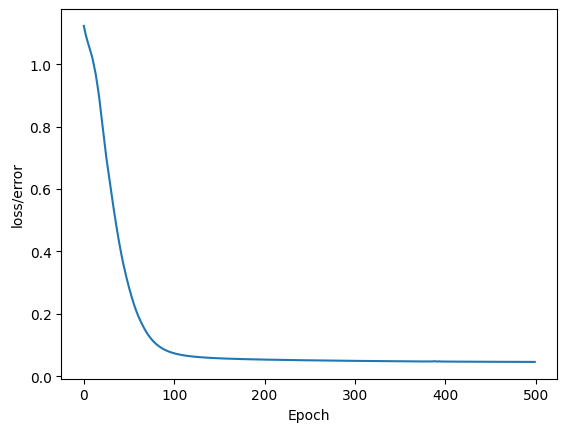

In [ ]:
# Graph it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [ ]:
# Evaluate Model on the Test Data set (Validate model on the test set)
with torch.no_grad(): # Basicaly turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval,y_test) # Find the loss or error

In [ ]:
loss

tensor(0.0254)

In [ ]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got correct :{correct}')


1.) tensor([-5.7144,  8.2917,  1.1198]) 	 1 	 1
2.) tensor([ 6.9804, -3.8947, -4.8312]) 	 0 	 0
3.) tensor([ 5.4466, -2.2195, -4.4320]) 	 0 	 0
4.) tensor([-6.9475,  8.6142,  2.6672]) 	 1 	 1
5.) tensor([-8.4446,  5.2843,  8.7034]) 	 2 	 2
6.) tensor([-11.3448,   5.9685,  12.4470]) 	 2 	 2
7.) tensor([ 4.7493, -1.4828, -4.2027]) 	 0 	 0
8.) tensor([ 6.2069, -3.0611, -4.6042]) 	 0 	 0
9.) tensor([-6.1948,  8.7111,  1.4021]) 	 1 	 1
10.) tensor([ 5.9672, -2.7306, -4.6371]) 	 0 	 0
11.) tensor([-7.2056,  9.0033,  2.6209]) 	 1 	 1
12.) tensor([-10.4592,   4.0506,  13.1702]) 	 2 	 2
13.) tensor([-3.1191,  6.3557, -0.7886]) 	 1 	 1
14.) tensor([-3.5901,  6.9669, -0.7282]) 	 1 	 1
15.) tensor([-9.5500,  5.3400, 10.3276]) 	 2 	 2
16.) tensor([-9.3808,  3.5730, 12.0215]) 	 2 	 2
17.) tensor([-6.2710,  7.8199,  2.5021]) 	 1 	 1
18.) tensor([-8.6097,  6.0648,  8.0568]) 	 2 	 2
19.) tensor([-3.8208,  7.1731, -0.6063]) 	 1 	 1
20.) tensor([ 6.6023, -3.3437, -4.9015]) 	 0 	 0
21.) tensor([ 5.4118, -

In [ ]:
# Predict output for new data

new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 6.2625, -3.1437, -4.5886])


In [ ]:
new_iris2 = torch.tensor([1.03,4.53,2.31,0.4])

In [ ]:
with torch.no_grad():
  print(model(new_iris2))

tensor([ 4.5070, -1.9615, -3.2361])


In [ ]:
# Save the model
torch.save(model.state_dict(),'my_iris_model.pt')


In [ ]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<ipython-input-53-9e43f07f766a>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris_model.pt'))


<All keys matched successfully>

In [ ]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)